In [9]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
seaborn.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


In [10]:
import sklearn
import sklearn.linear_model

In [63]:
def make_data(N):
    gx = np.linspace(-3, 3, 500).reshape(500,1)
    dx = np.random.random(size=(N, 1)) * 6 - 3
    return gx, dx

def make_weights(d):
    return np.random.normal(size = (d, 1))

In [96]:
def id_basis(x, d):
    return x

def cos_basis(x, d):
    return np.cos(x * np.arange(0, d)) 

def sin_basis(x, d):
    return np.cos(x * np.arange(0, d)) 

def poly_basis(x, d):
    return np.power(x, np.arange(0, d)+1)

bw = 0.5
def rbf_basis(x, d):
    return np.exp(-np.power(x - (np.linspace(-3, 3, d) / bw) , 2))

basis = rbf_basis

In [71]:
n = 50
gx, dx = make_data(n)

In [97]:
d = 5
gPhi = basis(gx, d)
dPhi = basis(dx, d)
wts  = make_weights(d)
gy   = np.dot(gPhi, wts)
df   = np.dot(dPhi, wts)

In [98]:
# Generate the data with noise.
ibeta = 2
dy = df + np.sqrt(ibeta)*np.random.normal(size = df.shape) # Add noise

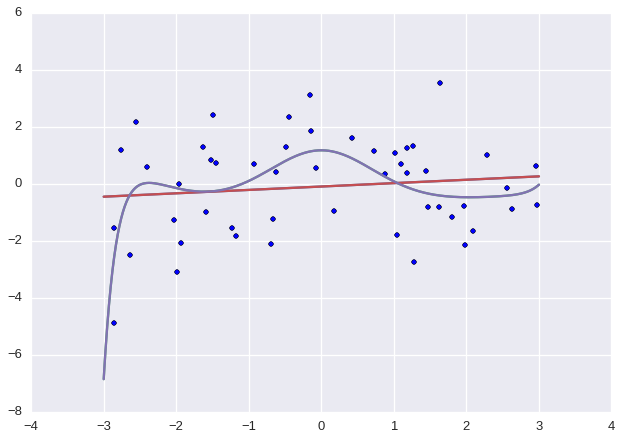

In [99]:
dy1 = sklearn.linear_model.LinearRegression().fit(dx, dy).predict(gx)
dy2 = sklearn.linear_model.LinearRegression().fit(dPhi, dy).predict(gPhi)

plt.scatter(dx, dy)
plt.plot(gx, dy1)
plt.plot(gx, dy2)
plt.scatter(dx, dy)
plt.plot(gx, dy1)
plt.plot(gx, dy2)

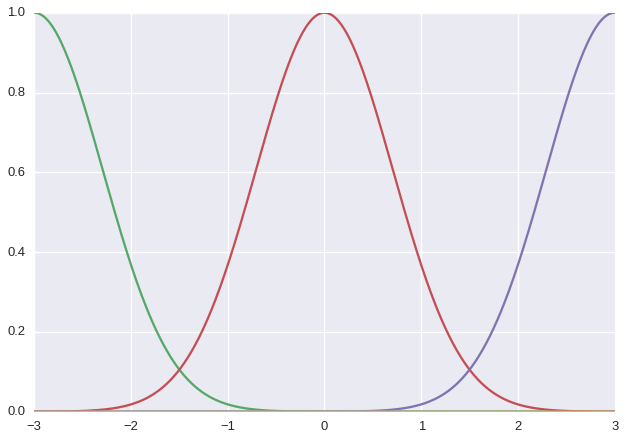

In [100]:
plt.plot(gx, gPhi)

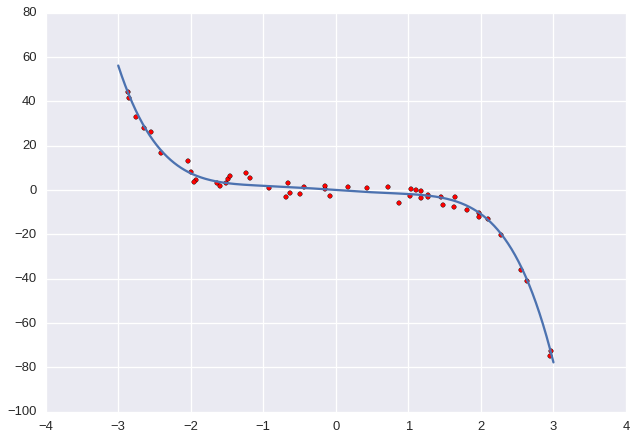

In [87]:
plt.scatter(dx[:,0],dy[:,0], c ="red")
plt.plot(gx, gy)

<Container object of 5 artists>

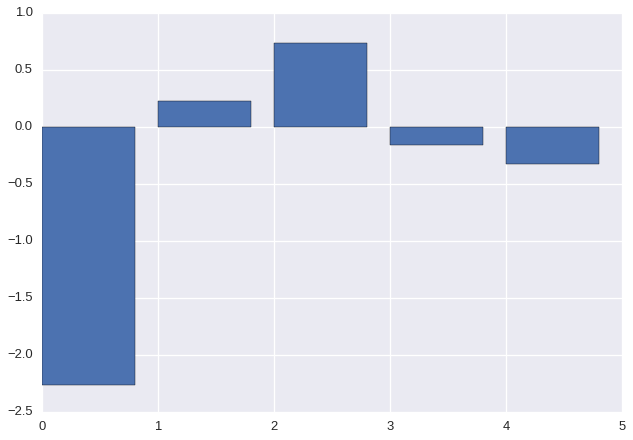

In [85]:
plt.bar(np.arange(d), wts)

(-8, 8)

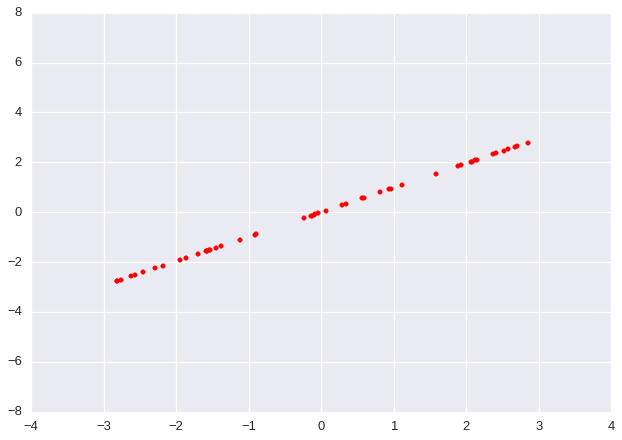

In [60]:
#plt.scatter(dx, dy)
plt.scatter(dx, dy2, color="red")
#plt.scatter(dx, dy3, color="green")
plt.ylim([-8,8])